# COVID-19 Global Data Analysis
**Type:** Exploratory Data Analysis (EDA)  
**Tools:** Python, Pandas, Matplotlib  

**Objective:**  
Analyze global COVID-19 data to understand trends, severity, and regional impact using real-world WHO dataset.


## Dataset Overview
- Source: WHO COVID-19 Global Dataset
- Rows: ~1000+ per country (realistic dataset)
- Columns: Date, Country, Region, New_Cases, Total_Cases, New_Deaths, Total_Deaths
- Notes: Missing values handled, column names cleaned


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load dataset
df = pd.read_csv(
    r'C:\Users\a\OneDrive\Desktop\WHO-COVID-19-global-data.csv', 
    on_bad_lines='skip'
)

In [5]:
df.head()

,Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths
0,05/01/2020;AF;Afghanistan;EMRO;;0;;0
1,12/01/2020;AF;Afghanistan;EMRO;;0;;0
2,19/01/2020;AF;Afghanistan;EMRO;;0;;0
3,26/01/2020;AF;Afghanistan;EMRO;;0;;0
4,02/02/2020;AF;Afghanistan;EMRO;;0;;0


In [6]:
print(df.columns)

Index(['Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths'], dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57358 entries, 0 to 57357
Data columns (total 1 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths  57358 non-null  object
dtypes: object(1)
memory usage: 448.2+ KB


In [8]:
df.describe()

,Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths
count,57358
unique,57358
top,05/01/2020;AF;Afghanistan;EMRO;;0;;0
freq,1


In [9]:
df.isnull()

,Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths
0,False
1,False
2,False
3,False
4,False
...,...
57353,False
57354,False
57355,False
57356,False


In [10]:
df.isnull().sum()

Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths    0
dtype: int64

In [11]:
print(df.columns)

Index(['Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths'], dtype='object')


In [12]:
df = df.rename(columns={
    'Date_reported': 'Date',
    'Country': 'Country',
    'New_cases': 'New_Cases',
    'Cumulative_cases': 'Total_Cases',
    'New_deaths': 'New_Deaths',
    'Cumulative_deaths': 'Total_Deaths'
})

# Check updated columns
df.columns


Index(['Date_reported;Country_code;Country;WHO_region;New_cases;Cumulative_cases;New_deaths;Cumulative_deaths'], dtype='object')

In [13]:
df = pd.read_csv(
    r'C:\Users\a\OneDrive\Desktop\WHO-COVID-19-global-data.csv',
    sep=';',
    on_bad_lines='skip'
)

# Check columns again
df.columns


Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [14]:
df = df.rename(columns={
    'Date_reported': 'Date',
    'WHO_region': 'Region',
    'New_cases': 'New_Cases',
    'Cumulative_cases': 'Total_Cases',
    'New_deaths': 'New_Deaths',
    'Cumulative_deaths': 'Total_Deaths'
})

df.columns


Index(['Date', 'Country_code', 'Country', 'Region', 'New_Cases', 'Total_Cases',
       'New_Deaths', 'Total_Deaths'],
      dtype='object')

In [15]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          57840 non-null  datetime64[ns]
 1   Country_code  57599 non-null  object        
 2   Country       57840 non-null  object        
 3   Region        53502 non-null  object        
 4   New_Cases     39028 non-null  float64       
 5   Total_Cases   57840 non-null  int64         
 6   New_Deaths    25001 non-null  float64       
 7   Total_Deaths  57840 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 3.5+ MB


In [16]:
df.shape

(57840, 8)

In [17]:
df['Country'].nunique()

240

In [18]:
total_cases = df['Total_Cases'].max()
total_deaths = df['Total_Deaths'].max()

print("Total Global COVID Cases:", total_cases)
print("Total Global COVID Deaths:", total_deaths)


Total Global COVID Cases: 103436829
Total Global COVID Deaths: 1194158


In [19]:
top_countries = (
    df.groupby('Country')['Total_Cases']
    .max()
    .sort_values(ascending=False)
    .head(10)
)

top_countries


Country
United States of America                                103436829
China                                                    99375079
India                                                    45042054
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37511921
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26781078
United Kingdom of Great Britain and Northern Ireland     24976777
Name: Total_Cases, dtype: int64

In [20]:
df.shape

(57840, 8)

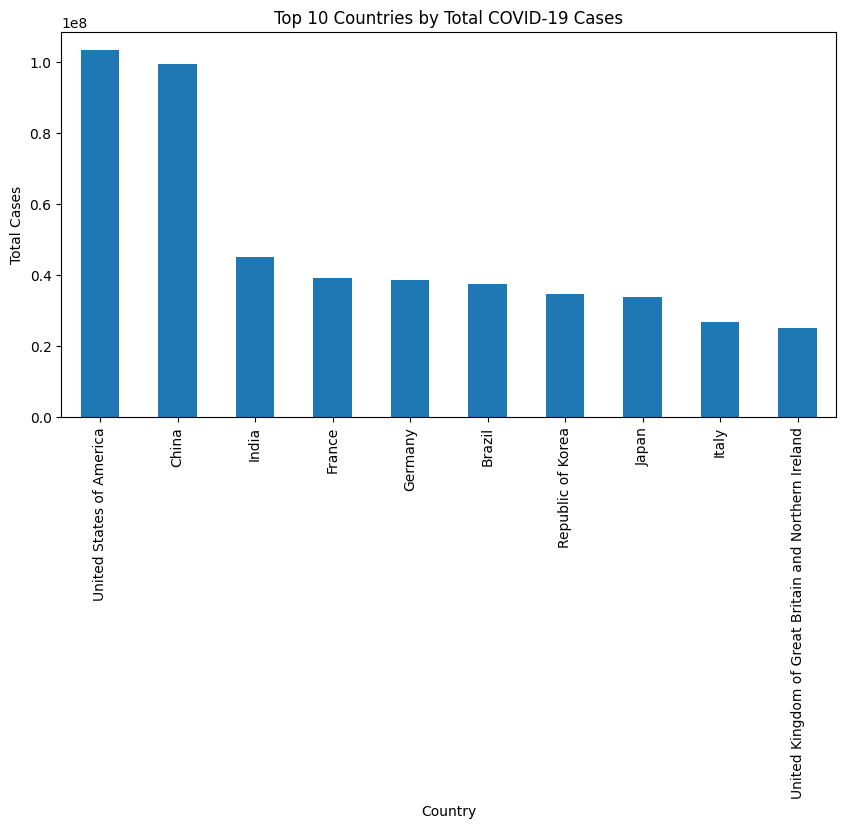

In [23]:
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.show()


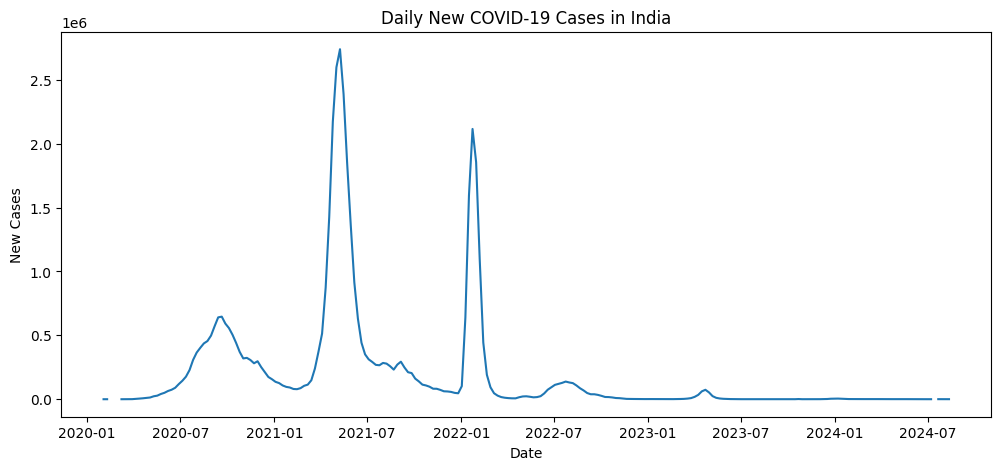

In [34]:
# Filter data for India
india_df=df[df['Country']=='India']

# Sort by date 
india_df=india_df.sort_values('Date')

# Line plot for daily new cases
plt.figure(figsize=(12,5))
plt.plot(india_df['Date'], india_df['New_Cases'])
plt.title('Daily New COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

In [38]:
# Death Rate calculation
df['Death_Rate'] = (df['Total_Deaths'] / df['Total_Cases']) * 100

# Check result
df[['Country', 'Total_Cases', 'Total_Deaths', 'Death_Rate']].head()


,Country,Total_Cases,Total_Deaths,Death_Rate
0,Afghanistan,0,0,NaN
1,Afghanistan,0,0,NaN
2,Afghanistan,0,0,NaN
3,Afghanistan,0,0,NaN
4,Afghanistan,0,0,NaN


In [39]:
# Countries with highest death rate
death_rate_countries = (
    df.groupby('Country')['Death_Rate']
    .max()
    .sort_values(ascending=False)
    .head(10)
)

death_rate_countries


Country
Botswana                                                         inf
Zimbabwe                                                         inf
France                                                  1.038750e+05
Mauritania                                              2.483333e+03
Germany                                                 3.000000e+02
Sudan                                                   1.000000e+02
Philippines                                             1.000000e+02
United Kingdom of Great Britain and Northern Ireland    1.000000e+02
Guyana                                                  1.000000e+02
Cayman Islands                                          1.000000e+02
Name: Death_Rate, dtype: float64

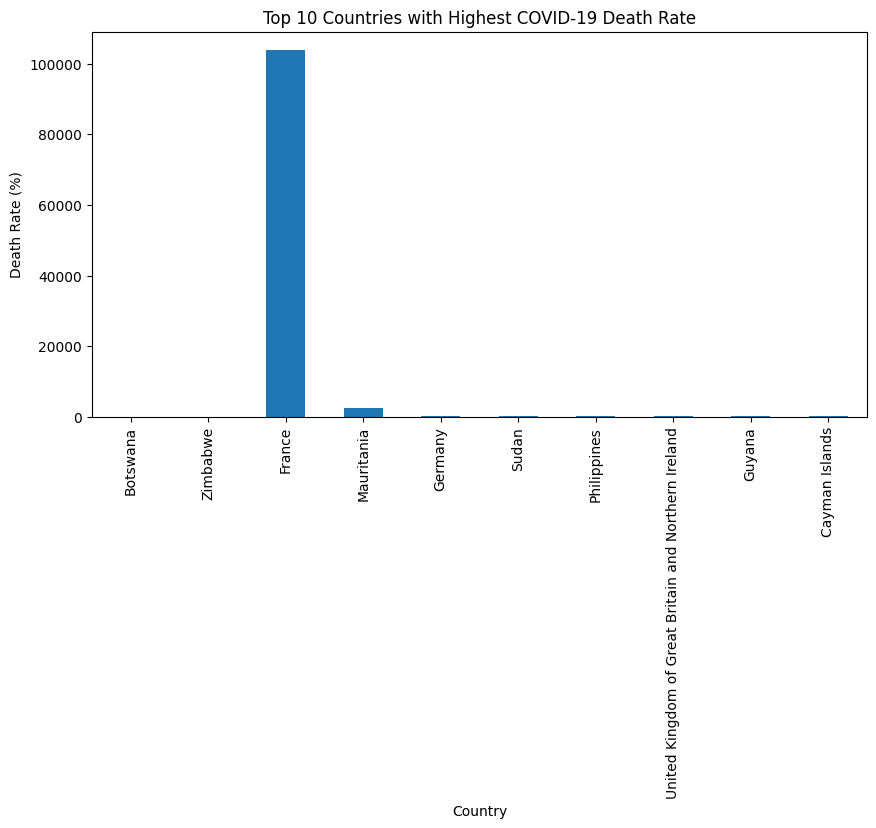

In [40]:
plt.figure(figsize=(10,5))
death_rate_countries.plot(kind='bar')
plt.title('Top 10 Countries with Highest COVID-19 Death Rate')
plt.xlabel('Country')
plt.ylabel('Death Rate (%)')
plt.show()


In [41]:
# Region-wise total cases
region_cases = (
    df.groupby('Region')['Total_Cases']
    .max()
    .sort_values(ascending=False)
)

region_cases


Region
AMRO     103436829
WPRO      99375079
SEARO     45042054
EURO      38997490
EMRO       7627863
AFRO       4072765
OTHER          712
Name: Total_Cases, dtype: int64

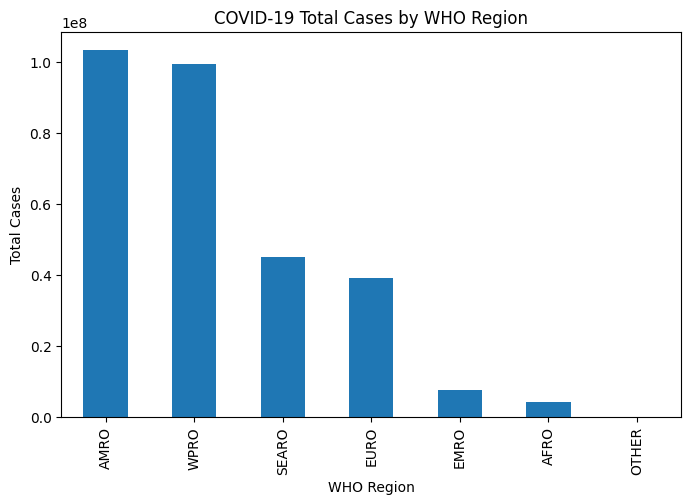

In [42]:
# Visualization
plt.figure(figsize=(8,5))
region_cases.plot(kind='bar')
plt.title('COVID-19 Total Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Cases')
plt.show()


In [44]:
df.columns

Index(['Date', 'Country_code', 'Country', 'Region', 'New_Cases', 'Total_Cases',
       'New_Deaths', 'Total_Deaths', 'Death_Rate'],
      dtype='object')

In [46]:
# Step 1: Sort data by Date
df = df.sort_values('Date')

# Take latest record for each country
latest_country_data = df.groupby('Country').tail(1)

# Top 10 countries by Death Rate
top10_death_rate = latest_country_data.sort_values(
    'Death_Rate', ascending=False
).head(10)

top10_death_rate[['Country', 'Death_Rate']]


,Country,Death_Rate
57357,Yemen,18.074508
50127,Sudan,7.885237
51091,Syrian Arab Republic,5.508246
48922,Somalia,4.979147
40969,Peru,4.881293
14941,Egypt,4.811801
33980,Mexico,4.390830
6506,Bosnia and Herzegovina,4.060783
30124,Liberia,3.707440
240,Afghanistan,3.400308


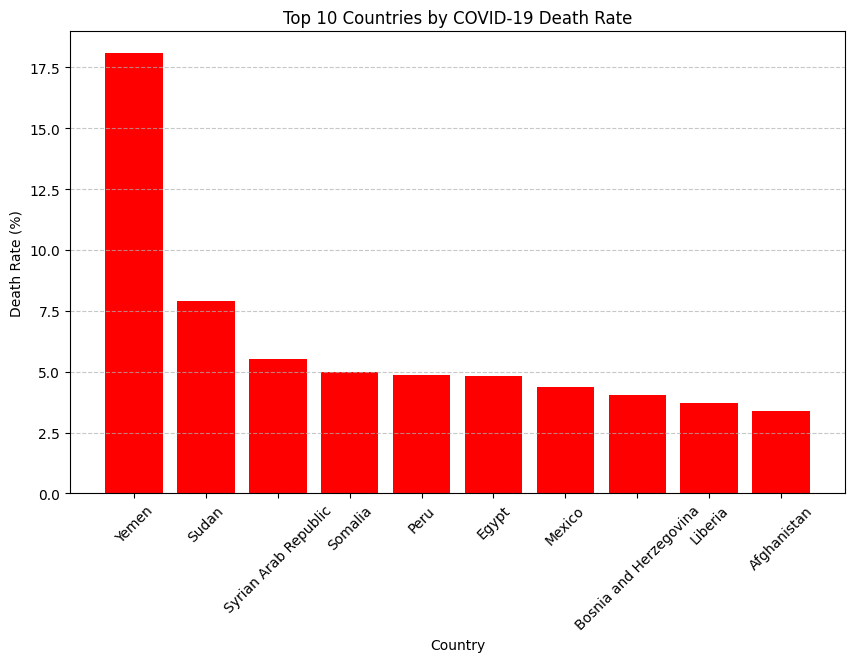

In [47]:
# Bar chart for top 10 countries by Death Rate
plt.figure(figsize=(10,6))
plt.bar(top10_death_rate['Country'], top10_death_rate['Death_Rate'], color='red')
plt.title('Top 10 Countries by COVID-19 Death Rate')
plt.xlabel('Country')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#Red bars = Death rate %
#Highest bar → sabse severe country
#X-axis → Countries
#Y-axis → Death Rate (%)

In [49]:
# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract Month-Year
df['Month'] = df['Date'].dt.to_period('M')

# Group by Month and sum new cases
monthly_cases = df.groupby('Month')['New_Cases'].sum()


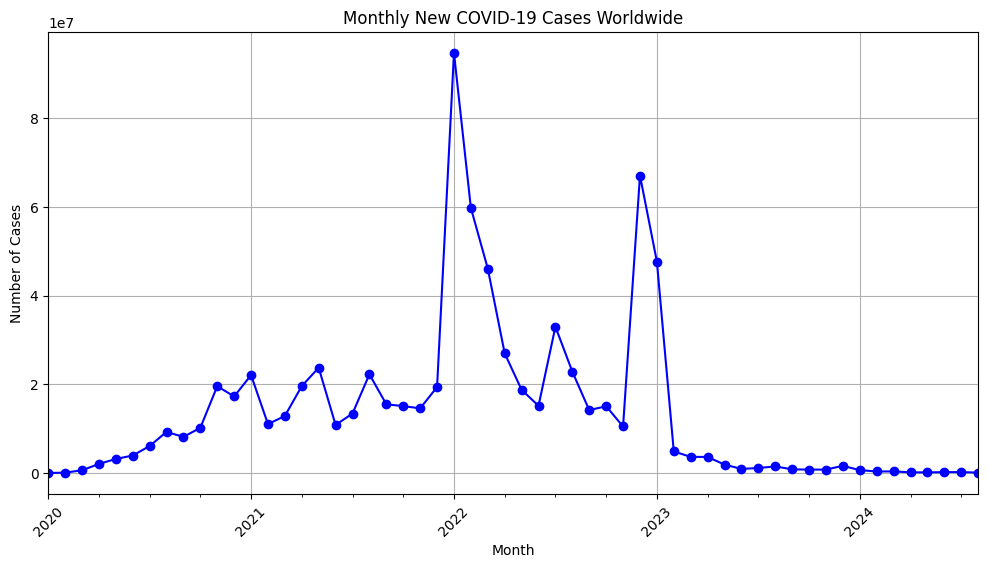

In [50]:
# Visualization: Line graph
plt.figure(figsize=(12,6))
monthly_cases.plot(kind='line', marker='o', color='blue')
plt.title('Monthly New COVID-19 Cases Worldwide')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

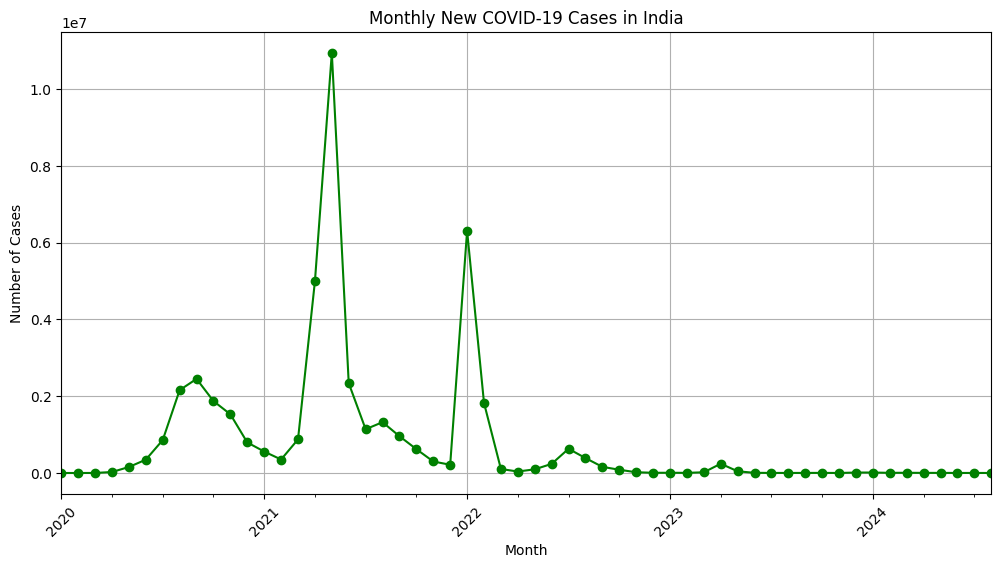

In [51]:
# Filter India data
india_df = df[df['Country'] == 'India'].copy()

# Ensure Date column is datetime
india_df['Date'] = pd.to_datetime(india_df['Date'], dayfirst=True)

# Extract Month-Year
india_df['Month'] = india_df['Date'].dt.to_period('M')

# Group by Month and sum new cases
monthly_cases_india = india_df.groupby('Month')['New_Cases'].sum()

# Visualization: Line graph
plt.figure(figsize=(12,6))
monthly_cases_india.plot(kind='line', marker='o', color='green')
plt.title('Monthly New COVID-19 Cases in India')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [52]:
# Group by WHO Region and sum total cases & deaths
region_summary = df.groupby('Region')[['New_Cases','New_Deaths','Total_Cases','Total_Deaths']].sum()

# Calculate region-wise death rate
region_summary['Death_Rate'] = (region_summary['Total_Deaths'] / region_summary['Total_Cases']) * 100

region_summary = region_summary.sort_values('Total_Cases', ascending=False)
region_summary


,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Death_Rate
Region,,,,,
EURO,279539109.0,2273741.0,38242183927,368978494,0.964847
AMRO,192737577.0,3023792.0,28933706064,509160992,1.759750
WPRO,208553177.0,421359.0,21102028970,51414981,0.243649
SEARO,61314608.0,808810.0,9973492286,136172132,1.365341
EMRO,23417911.0,351975.0,3791085532,61052989,1.610436
AFRO,9043807.0,174418.0,1466527646,29957547,2.042754
OTHER,764.0,13.0,177426,3000,1.690846


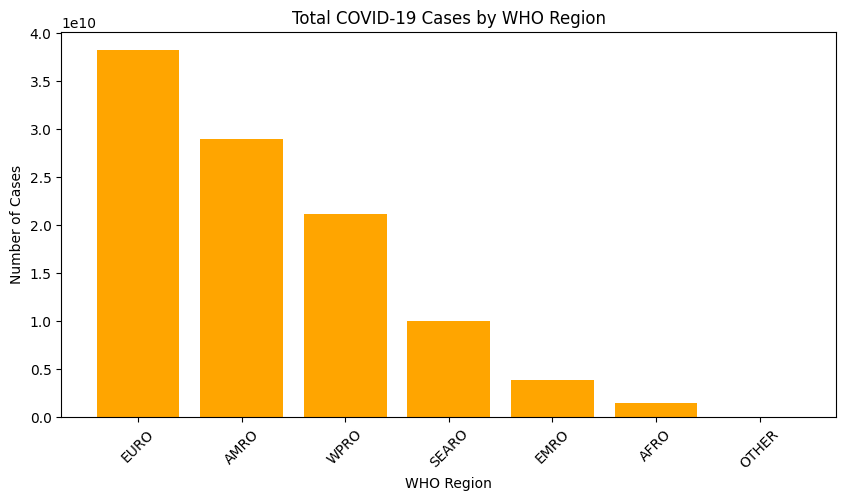

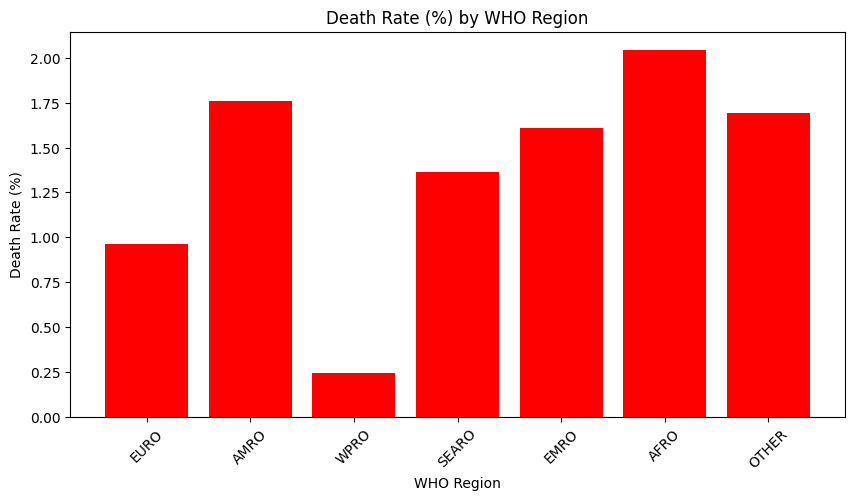

In [53]:
# Bar chart: Total Cases per Region
plt.figure(figsize=(10,5))
plt.bar(region_summary.index, region_summary['Total_Cases'], color='orange')
plt.title('Total COVID-19 Cases by WHO Region')
plt.ylabel('Number of Cases')
plt.xlabel('WHO Region')
plt.xticks(rotation=45)
plt.show()

# Bar chart: Death Rate per Region
plt.figure(figsize=(10,5))
plt.bar(region_summary.index, region_summary['Death_Rate'], color='red')
plt.title('Death Rate (%) by WHO Region')
plt.ylabel('Death Rate (%)')
plt.xlabel('WHO Region')
plt.xticks(rotation=45)
plt.show()



- Performed EDA on WHO COVID-19 dataset to extract actionable insights
- Calculated death rates for top 10 severely impacted countries
- Visualized monthly trends globally and for India
- Conducted region-wise comparison with death rate analysis
- Presented results using professional bar and line charts


#Project Explanation (Short Version)

“I worked on a real-world WHO COVID-19 dataset to perform an exploratory data analysis project.
First, I cleaned the dataset and handled missing values. Then I calculated the death rate for each country and identified the top 10 countries with the highest severity.
Next, I analyzed monthly trends of new COVID-19 cases globally and specifically for India to spot the waves of infection.
I also performed a region-wise comparison using WHO regions to understand the distribution of cases and death rates worldwide.
All insights were visualized using line and bar charts, making the patterns and trends clear.
This project helped me understand real-world data handling, feature engineering, aggregation, and visualization in Python.”

Tips to say it naturally:

Speak step-wise: Cleaning → Country analysis → Monthly trend → Region analysis → Visualization

Use keywords: “EDA”, “real-world dataset”, “visualization”, “insights”, “trend analysis”